# Problema 1

In [1]:
from collections import Counter
from IPython.display import display
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import spacy
import nltk
import re

In [2]:
tw_source = pd.read_csv("tw_source.csv", header=None, encoding = "ISO-8859-1")

tw_df = pd.DataFrame(tw_source.values, columns=["c1","id","datetime","query","username","tweet"])
tw_df.head()

,c1,id,datetime,query,username,tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


### Encontrando usuarios mencionados en los Tweets

In [3]:
users = list()
for tweet in tw_df["tweet"]:
    pattern = "@(\w{1,15})"
    users_match = re.findall(pattern,tweet)
    for user in users_match:
        users.append(user)

### 3 usuarios más populares

In [4]:
popular_users_df = pd.DataFrame(Counter(users).most_common(3), columns=["Usuario","Menciones"] )
popular_users_df

,Usuario,Menciones
0,mileycyrus,4500
1,tommcfly,3887
2,ddlovato,3467


### Corpus de Tweets

Para crear los corpus de los tweets se tomará el primer match donde se mencione a los usuarios populares.

In [5]:
corpus_columns = ["Content","ID","Timestamp","Tweet Length"]
users_corpus = {}

for user in popular_users_df["Usuario"]:
    users_corpus[user] = pd.DataFrame(columns=corpus_columns)
    
for index,row in tw_df.iterrows():
    for user in popular_users_df["Usuario"]:
        match = re.search("@"+user,row["tweet"])
        if match:
            tweet_id = str(row["id"])
            if not re.match("\d+",tweet_id):
                tweet_id = "Undefined"
            users_corpus[user] = users_corpus[user].append({"Content":row["tweet"], "ID":tweet_id,"Timestamp":row["datetime"], "Tweet Length":len(row["tweet"])},ignore_index=True)
            
for user in popular_users_df["Usuario"]:
    display(users_corpus[user].head(10))
    print("Corpus Usuario: "+user)

,Content,ID,Timestamp,Tweet Length
0,@mileycyrus hahaha dont be like that one time ...,1468063101,Mon Apr 06 23:30:57 PDT 2009,107
1,"@mileycyrus i have the same problem, but it's ...",1468286517,Tue Apr 07 00:45:20 PDT 2009,137
2,@mileycyrus I guess counting sheep didn't work...,1468297110,Tue Apr 07 00:49:07 PDT 2009,72
3,@mileycyrus I would too if it meant spending a...,1468298918,Tue Apr 07 00:49:44 PDT 2009,100
4,@mileycyrus AWWW u seriously have the cutest d...,1468318249,Tue Apr 07 00:56:41 PDT 2009,112
5,@mileycyrus http://twitpic.com/2xszg - Napping...,1468333186,Tue Apr 07 01:01:52 PDT 2009,116
6,@mileycyrus where did you find that quote... n...,1468340955,Tue Apr 07 01:04:40 PDT 2009,129
7,@mileycyrus http://twitpic.com/2y606 - I want ...,1468382935,Tue Apr 07 01:19:59 PDT 2009,75
8,@mileycyrus ouch mine too,1468689241,Tue Apr 07 03:10:51 PDT 2009,26
9,"@mileycyrus dude, I have to go on a 4 mile run...",1468764264,Tue Apr 07 03:36:33 PDT 2009,103


Corpus Usuario: mileycyrus


,Content,ID,Timestamp,Tweet Length
0,@tommcfly hey saw u guys play @ pushover..didn...,1468210813,Tue Apr 07 00:19:09 PDT 2009,138
1,@tommcfly Good morning Tom! Why can't I send y...,1468233211,Tue Apr 07 00:26:52 PDT 2009,131
2,@tommcfly did you know that johnsons baby use ...,1468391638,Tue Apr 07 01:23:07 PDT 2009,96
3,"@dougiemcfly @tommcfly good morning guys, how ...",1468502040,Tue Apr 07 02:03:41 PDT 2009,108
4,"@tommcfly hey, no chance of adding brighton or...",1468618787,Tue Apr 07 02:46:02 PDT 2009,131
5,"@tommcfly have fun tom, i need to buy eclipse ...",1468674970,Tue Apr 07 03:05:49 PDT 2009,82
6,@tommcfly are you coming to play at Plymouth a...,1468945705,Tue Apr 07 04:31:47 PDT 2009,134
7,@tommcfly :O starbucks! never tehe oooh now i ...,1469438932,Tue Apr 07 06:23:07 PDT 2009,55
8,@tommcfly aw i want a starbucks,1469466152,Tue Apr 07 06:28:08 PDT 2009,32
9,@tommcfly i have to still read eclipse as well...,1470070258,Tue Apr 07 08:15:31 PDT 2009,136


Corpus Usuario: tommcfly


,Content,ID,Timestamp,Tweet Length
0,@ddlovato @David_Henrie ummmmm i cant find it.,1467929230,Mon Apr 06 22:51:34 PDT 2009,47
1,@ddlovato Do you hate us?? Please don't,1467953367,Mon Apr 06 22:58:30 PDT 2009,40
2,@ddlovato Wish that i could see it.. Thats th...,1469661950,Tue Apr 07 07:02:58 PDT 2009,96
3,"@ddlovato hey demi, wen are you and selena gon...",1469674492,Tue Apr 07 07:05:11 PDT 2009,79
4,@ddlovato ahhhh i wish i could go to the dalla...,1548280868,Fri Apr 17 20:31:31 PDT 2009,85
5,@ddlovato I just saw your tour dates and now I...,1548773731,Fri Apr 17 21:56:12 PDT 2009,116
6,"@ddlovato sonny with a chance in the UK, only ...",1551831910,Sat Apr 18 10:05:14 PDT 2009,138
7,@ddlovato demii!! how is your stage going to b...,1552024212,Sat Apr 18 10:35:16 PDT 2009,121
8,"@ddlovato hi demi, at which airport in Germany...",1553173354,Sat Apr 18 13:33:51 PDT 2009,138
9,@ddlovato awww. why. omg i really wana c ure n...,1553237653,Sat Apr 18 13:44:01 PDT 2009,77


Corpus Usuario: ddlovato


### Extracción de Contexto
Se procede a crear un bag of words por cada usuaro.

In [6]:
def normalization(corpus):
    newCorpus = []
    for doc in corpus:
        newCorpus.append(re.sub(r'[^a-zA-Z0-9\s{1}áéíóúüñÁÉÍÓÚ]', '', doc).lower().strip().rstrip('\n').rstrip('\r\n'))
    return newCorpus

def tokenization(corpus):
    newCorpus = []
    for doc in corpus:
        newCorpus.append(nlp(doc))
    return newCorpus

def remove_stopwords(corpus):
    newCorpus = []
    for doc in corpus:
        s = ""
        for token in doc:
            if(token.is_stop == False):
                s = s + token.text + " "
        newCorpus.append(s.strip())
    return newCorpus   

def stemming_and_lemmanting(corpus):
    documents = tokenization(corpus)
    newCorpus = []
    for doc in documents:
        s = ""
        for token in doc:
            s = s + token.lemma_ + " "
        newCorpus.append(s.strip())
    return newCorpus

def remove_user_mention(corpus, user):
    newCorpus = []
    for doc in corpus:
        newCorpus.append(doc.replace(user,""))
    return newCorpus

In [7]:
bags_of_words = {}
nlp = spacy.load("en_core_web_sm")
nlp.Defaults.stop_words.add("nt") #Se agrega stop words porque se tokeniza dont i cant como do nt

for user in popular_users_df["Usuario"]:
    corpus = normalization(users_corpus[user]['Content'])
    corpus = tokenization(corpus)
    corpus = remove_stopwords(corpus)
    corpus = stemming_and_lemmanting(corpus)
    
    corpus = remove_user_mention(corpus,user)
    bags_of_words[user] = corpus

### Cálculo de IDF
Se procederá a crear una matriz de TF y a calcular su IDF para obtener las 20 palabras más relevantes de cada usuario.

In [8]:
def generateEmptyTF(cols, rows):
    outDf = pd.DataFrame(index=rows, columns=cols)
    outDf = outDf.fillna(0)
    return outDf

def calculoTF(corpus, df):
    corpus = tokenization(corpus)
    for index, doc in enumerate(corpus):
        docLen = len(doc)
        for word in doc:
            try:
                colIndex = list(df.columns).index(word.text)
                df.iloc[index, colIndex] =  df.iloc[index, colIndex] + 1
            except:
                pass
        df.iloc[index, :] = df.iloc[index, :] / docLen
    return df   

def calculoIDF(df):
    N = df.shape[0]
    valX = (N/df.astype(bool).sum(axis=0))
    idfValues = pd.Series(np.log(valX))
    return idfValues  

In [12]:
idf_users = {}

for user in popular_users_df["Usuario"]:
    tf_headers =  " ".join(bags_of_words[user])
    tf_headers = set(re.split("\s+",tf_headers.strip()))
    tf_corpus = generateEmptyTF(list(tf_headers), range(0,len(bags_of_words[user])))
    tf_matrix = calculoTF(bags_of_words[user], tf_corpus)
    idf = calculoIDF(tf_matrix).sort_values(ascending=True)
    idf_users[user] = idf
    print("IDF tweets usuario: "+user)
    display(idf.head(20))

IDF tweets usuario: mileycyrus


love       1.665771
miley      1.699308
nt         1.740333
m          2.065950
good       2.179349
u          2.199231
vote       2.408416
come       2.601688
s          2.673258
hope       2.682983
like       2.833882
win        2.853003
award      2.916769
movie      2.954510
want       2.993730
fan        3.057973
amazing    3.062723
know       3.067496
hey        3.081955
song       3.116526
dtype: float64

IDF tweets usuario: tommcfly


nt        1.655529
tom       1.725292
love      2.164559
m         2.182659
come      2.370475
good      2.438878
xx        2.496557
u         2.637257
guy       2.651750
haha      2.666456
like      2.700358
x         2.704197
reply     2.780081
brazil    2.809557
fan       2.818141
miss      2.908292
think     2.937002
s         2.937002
know      3.007383
hope      3.033770
dtype: float64

IDF tweets usuario: ddlovato


nt         1.582543
love       1.774407
demi       1.807084
m          1.976207
come       2.292592
u          2.345082
s          2.546752
wish       2.607147
good       2.611046
wait       2.696638
hope       2.709486
like       2.718144
amazing    2.883224
haha       2.903950
want       2.963266
know       3.038230
awesome    3.081050
ur         3.106367
reply      3.119271
day        3.152277
dtype: float64

### Razón por la que citan al usuario
Basado en la frecuencia inversa de término, podemos decir que los usuarios hacen las menciones por las siguientes razones.

#### Usuario mileycyrus
Los usuarios demuestran su apreciación hacia la estrella Miley Cyrus y han votado por ella en alguna entrega de premios.

#### Usuario tommcfly
Los fans extrañan por alguna razón a tommcfly y demuestran su aprecio por el.

#### Usuario ddlovato
Al igual que los otros 2 casos, los fans brindan muestras de afecto y admiración hacia Demi Lovato.

Es interesante que en los 3 IDF podemos ver que la palabra **love** y en 2 de ellos la palabra **amazing** y **awesome** por lo que podríamos decir que los tweets representan pensamientos positivos hacia los usuarios.

### Word Clouds

Word Cloud usuario mileycyrus


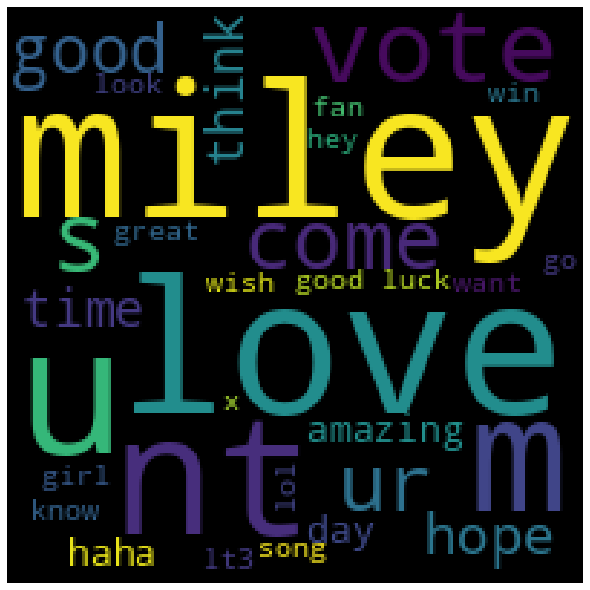

Word Cloud usuario tommcfly


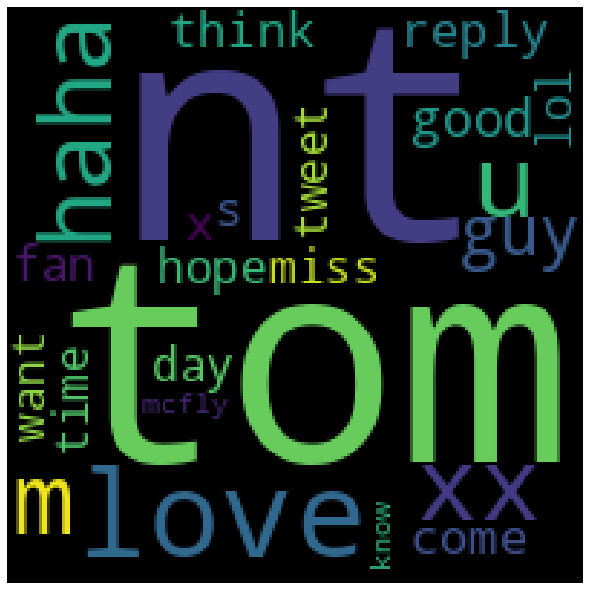

Word Cloud usuario ddlovato


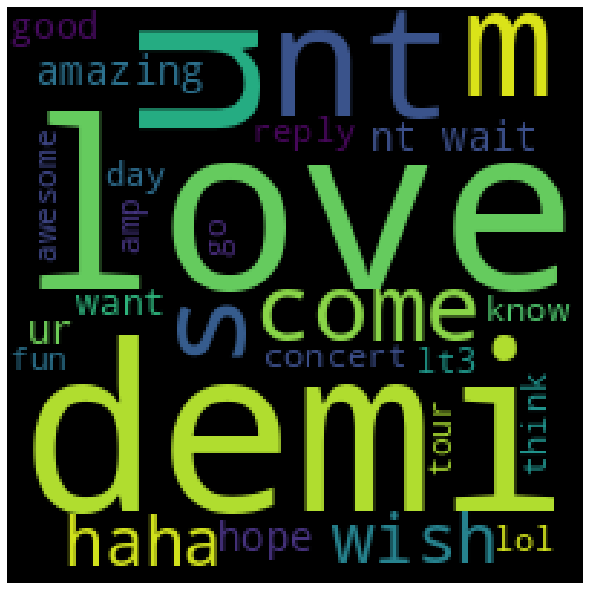

In [11]:

for user in popular_users_df["Usuario"]:
    print("Word Cloud usuario "+user)
    wordcloud = WordCloud(width = 200, height = 200,
                    background_color ='black',
                    min_font_size = 10).generate(" ".join(bags_of_words[user]))

    # plot the WordCloud image                      
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)

    plt.show()